## GARCH model for VaR
This notebook will be revealed in a YouTube video all of the images were removed in the process of uploading to GitHub. These notes are based upon the text Analysis of Financial Time Series by Ruey S. Tsay, the text Measure Market Risk by Kevin Dowd and the text Futures,Options and other Derivatives by John C. Hull. MPT(Modern portforlio theory) heavily relys upon VaR(value at risk) and CVaR(conditional value as risk) metric. The VaR metric simply computes the probability of loss of a given portforlio under a time horizon. The CVaR metric or the expected short fall is the average loss expected over the time horizon. The calculation of VaR can be done non-parameterically(PCA(Principal Component Analysis), historical simulation) or parameretically(time-series models such as ARCH, EWMA,GARCH, etc) both types have there benefits and cons and typically it is best to explore the results for both. Although it most common to use principal component analysis and parametric methods in practice. The CVaR metric is calculated by taking the integral of the VaR over statistical confidence alpha, which is approximated as a mean. According to lecture 7 in the MIT course Topics in Mathematics with Applications in Finance, the lectruer Kenneth Abbott more or less states that most major banks in the 90's used PCA for VaR. 
 


Orignally developed by Harry Markowitz in 1952, MPT was developed from the simple idea echoed in Adam Smith's A Wealth of Nations, that high risk should be well compensated with high reward. In mathematical terms there is a trade off between the expected return and the variance of the return; this idea becomes the basis for the efficent frontier, which formalizes the 'goldilocks' zones for portforlio in terms of the trade of between risk and reward. This is visualized with the graph below. The mean- variance framework set the stage for William Sharpe's paper published in 1964 where he demonstrated, using the notorious CAPM(Capital Asset Pricing Model), that the super efficent portforlio must be the market portforlio AKA the S&P.
![alt text](frontier.jpg)
The curve you see above is a plot of a portforlio varied by weights for expected return and standard deviation. The risk free rate line intersects the super effcient portforlio or where the *Sharpe ratio* is maximized.
Many money managers rely upon the Sharpe Ratio as a metric for risk-adjusted return for a given portforlio, the ratio is given as
\begin{array}
 SS &=& \frac{R_a - R_f}{\sigma_a}
\end{array}
it is easy to see that the Sharpe ratio is derived from CAPM given by 
\begin{array}
 \\ R_a &=& R_f + \beta_i ( R_m - R_f)
\\ \beta=\frac{COV(R_a,R_m)}{ \sigma^2_m}
\end{array}
R_f is the risk free rate of a treasury security, R_m is the return of the market AKA S&P, and R_a is the expected return of the portforlio



picture above: https://www.glynholton.com/notes/capital_market_line/

The VCV method assumes the following:
1.The change in the portforlio is linerarly dependent on percentage changes in market variables
2.The percent changes follow a normal distribution.
The method is given by the following equations:
\begin{array}{rcl}
\\ \sigma &=& \sqrt{w_0 \Sigma w^T_0}
\\ VaR &=& \mu + Z(\alpha) \sigma
\\ CVaR  &=& \int^\alpha_0 VaR(\chi) d\chi
\\ w_0 w^T_0 =1
\end{array}

Risk managers also often use parametric models of volatility of returns of a portforlio.  Recall that the ARCH( auto-regression conditional heteroskedasticity)model was inspired to consider the variance of the residuals of the returns by only regressing on the previous values of the time-series as an AR model. The GARCH model generalizes(the G stands for general) this by also regressing on the residuals of the residuals of return, like how an MA model regresses on the residual of the model, but we model the volatility of returns, not the returns. Thus, making the GARCH similar to ARMA in that it depends on previous values and residuals of our model. The GARCH model includes mean-reversion similar to a Ornstein-Uhlnbeck process where over time the model tends to get pulled back to the long run variance.  The parameters of the models are often estimated using the maximum log likelihood method, the classical stats OLS method or the generalized method of moments. The Box-Jenkins procedure is often the most applied method in time series as it so general, the wikipedia screen shot of the procedure is below. 
![alt text](boxjenk.jpg)
https://en.wikipedia.org/wiki/Box–Jenkins_method

The likelihood of returns is given below 
\begin{array}
\\ L(r_t,\theta)= \prod^{T}_{t=1} \frac{1}{\sqrt{2* \pi * \sigma_t}} \exp( \frac{-(r_t - \mu_t)^2}{2\sigma^2_t})
\end{array}

In order to determine the order of the processes the graphs of the ACF(autocorrelation function) and PACF(partial autocorrelation function) over lagged values are required. Then the ACF is used for hypothesis testing to discover if r_t has autocorrelation with any values r_(t-i) ; this is typically done using the statistic the T-ratio under a normal distribution. The Ljung Box test is also commonly used. The ACF and PACF are defined as such: 
\begin{array}
ACF_k &=& \frac{Cov(r_t,r_{t-k})}{Var(r_t)}
,PACF_k=\frac{Cov(r_t,r_{t-k})}{Var(r_t)Var(r_{t-k})}
\end{array}


Another way to think of PACF is to consider the set of equations
 \begin{array}{rcl}
r_t &=& \phi_{0,1} + \phi_{1,1} r_{t-1}
\\ r_t &=& \phi_{0,2} + \phi_{1,2} r_{t-1} + \phi_{2,2} r_{t-2}
\\ r_t &=& \phi_{0,3} + \phi_{1,3} r_{t-1} + \phi_{2,3} r_{t-2} + \phi_{3,3} r_{t-3}
\\ r_t &=& \phi_{0,4} + \phi_{1,4} r_{t-1} + \phi_{2,4} r_{t-2} + \phi_{3,4} r_{t-3} + \phi_{4,4} r_{t-4}
\end{array}

From this definition it will be clear of which of the lags have more a contribution to the time-series, the phi(ith,ith) coeffcient of each equation is the PACF for the lag i. For example the first equation has PACF phi(1,1) at lag 1. For the second equation PACF is phi(2,2) at lag 2. And so on...




AR(p):
\begin{array}{rcl}
r_t &=& \phi_0 + \Sigma^p_i \phi_i r_{t-i}
\end{array}
The AR model assumes a stationary data(typically verified through a Dickey-Fuller test via testing the unit root of process). To make a time series stationary this is typically achieved using the differencing transformation or taking the natural log. The mean and variance of the AR(p) process are given by:
\begin{array}{rcl}
\\ E(r_t)=\frac { \phi_0 } {1+\Sigma_p - \phi_p}
\\ Var(r_t)= \sigma_a^2 + \Sigma^p_i \phi_i \gamma_{i}
\end{array}
sigma_a is the variance of the residual a_t and gamma is the covariance of the current point with a lagged point T as such COV(X_{t},X_{t+T})

The stationarity of the AR(p) can be explored by examining its represenation with the Backshift operator B,
\begin{array}{rcl}
\\ B r_t &=& r_{t-1}
\\ B^p r_t &=& r_{t-p}
\\ r_t &=& \phi_0 + \Sigma^p_i \phi_i r_{t-i}
\\ \Phi(B) r_t &=& c_0
\\ \Phi(B)=1-\Sigma \phi_i B
\end{array}
captial phi is known as the characteristic polynomial of the recursion relation, which those familar with solving recursion relations or ODE's(Ordinary differential equations) will be familiar with. If the roots of the characteristic polynomial of the process are greater than one the process is stationary. 

MA(q):

\begin{array}{rcl}
r_t &=& c_0 + \Sigma^q_i \theta_i a_{t-i}
\end{array}
where the mean and the varaince of the MA(q) process are given by:
\begin{array}{rcl}
\\ E(r_t)=c_0
\\ Var(r_t)=(1 + \Sigma^q_i \theta^2_a)\sigma^2_a
\end{array}
a_t the residual of the estimate of the return model and sigma_a squared is the variance of a_t. 


ARMA(p,q):

\begin{array}{rcl}
r_t &=& d_0 + \Sigma^q_i \theta_i a_{t-i} + \Sigma^p_i \phi_i r_{t-i}
\end{array}

for the ARMA process the mean is the same as the AR since E(a_t)=0

\begin{array}{rcl}
\\ E(r_t)=\frac { \phi_0 } {1+\Sigma_p - \phi_p}
\end{array}


GARCH(p,q):
\begin{array}{rcl}
\\ a_t &=& \sigma_t \epsilon_t 
\\ \sigma^2_t &=& \psi_0 + \Sigma^q_i \alpha_i a_{t-i} + \Sigma^p_i \beta_i r_{t-i}
\end{array}
The parameters obey the follow constraints
\begin{array}{rcl}
\psi_0,\alpha,\beta >= 0
\\ \alpha + \beta < 1
\\ v_{longrun}&=& \frac{\psi_0}{1-\alpha-\beta}
\end{array}
where epsilon is a random variable with mean zero and constant variance. 
The mean of the GARCH model is given by 
\begin{array}{rcl}
\\ E(a^2_t)=\frac { \alpha_0 } {1-  \Sigma^p_i \alpha_i + \beta_i}
\end{array}

We will use the ARCH module in python, which has several types of volatility forecasting:
![alt text](forecasting.jpg)

Resources:

Sharpe ratio: http://www.celeritymoment.com/sitebuildercontent/sitebuilderfiles/cdroussiots_ch4_excerpt.pdf

MIT VaR lecture: https://www.youtube.com/watch?v=92WaNz9mPeY&t=3731s

Code example of GARCH(1,1) on returns Python: https://www.youtube.com/watch?v=3boMYvIzGQ8

The equation for VaR: https://bookdown.org/gary_a_napier/time_series_lecture_notes/ChapterThree.html#variance-1

Helpful notes: https://projector-video-pdf-converter.datacamp.com/22276/chapter4.pdf

Other helpful notes: https://math.unice.fr/~frapetti/CorsoP/chapitre_23_IMEA_1.pdf

PACF notes: https://timeseriesreasoning.com/contents/partial-auto-correlation/

Code ARCH Code forcasting bootstrapping historical and parametrric tutorial: https://arch.readthedocs.io/en/latest/bootstrap/semiparametric-parametric-bootstrap.html#parametric-bootstraps

Code Helpful ARCH tutorial: https://goldinlocks.github.io/ARCH_GARCH-Volatility-Forecasting/

We will import TSLA closing data for a year of data, instead of webscrapping or importing a CSV yfinance is the most convinient option

In [71]:
# Importing the proper packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spop
import yfinance as yf
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
from scipy import stats

In [130]:
from scipy.optimize import minimize
%matplotlib inline

tick="TSLA"
start = '2016-12-31'
end = '2021-06-25'
#downloading data

news= yf.download(['TSLA'], start, end)['Close']
news2= yf.download(['ENPH'], start, end)['Close']
news.head()
news=np.array(news)[1:]/np.array(news)[:-1]-1
news2=np.array(news2)[1:]/np.array(news2)[:-1]-1
#print(news)

data=[news.T,news2.T]
data=np.array(data)

#print(100*stuf(0.88,0.99,data))
print()
print((data[:][0]))
print(news) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

[ 0.04608507 -0.00105732  0.00996692 ...  0.00463896  0.05268472
  0.0354113 ]
[ 0.04608507 -0.00105732  0.00996692 ...  0.00463896  0.05268472
  0.0354113 ]


[*********************100%***********************]  1 of 1 completed


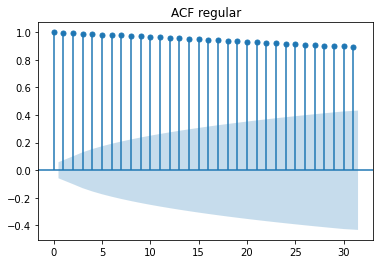

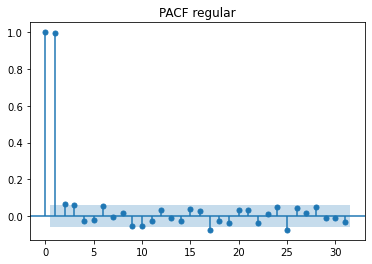

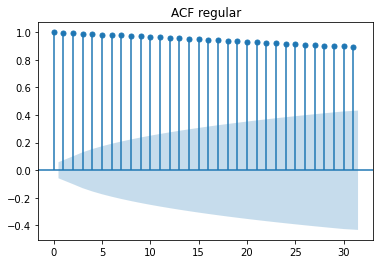

In [9]:

series = yf.download(tick, start, end)['Close']
series.head()

stuff=np.array(series)

plot_pacf(stuff,title="PACF regular")
plot_acf(stuff,title="ACF regular")

In [72]:
series.describe()

count    1127.000000
mean      180.226598
std       220.654414
min        35.793999
25%        58.362999
50%        67.578003
75%       163.244003
max       883.090027
Name: Close, dtype: float64

P-value of data 0.9733232009921228
P-value of differenced data 2.878345291958445e-08


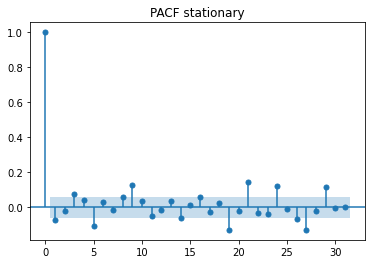

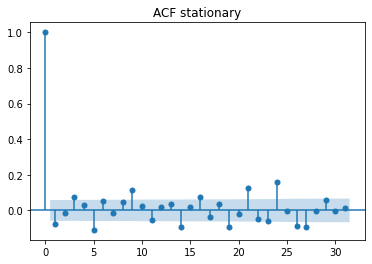

In [11]:
## First order seasonally differenced
stuff2=np.diff(stuff)

plot_pacf(stuff2,title="PACF stationary")
plot_acf(stuff2,title="ACF stationary")

adfTest = adfuller(stuff, autolag='AIC')
adfTest2 = adfuller(stuff2, autolag='AIC')

print("P-value of data",adfTest[1])
print("P-value of differenced data",adfTest2[1])

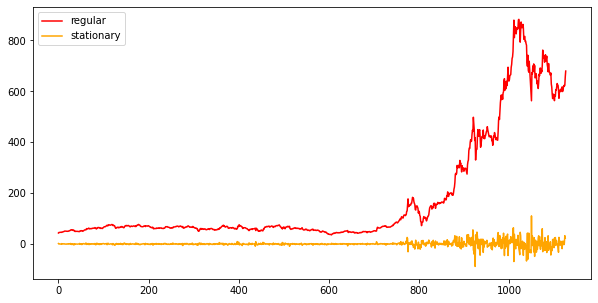

pvalue for normality(skewness and kurtosis of N(mu,sigma)) 0.0


In [12]:
plt.figure(figsize=(10,5))
plt.plot(stuff, color = 'red', label = 'regular')

# Plot the time series
plt.plot(stuff2, color = 'orange', label = 'stationary')

plt.legend()
plt.show()

jaqque=stats.jarque_bera(stuff)
print('pvalue for normality(skewness and kurtosis of N(mu,sigma))',jaqque[1])


**ACF, PACF and stationarity** From looking at the PACF and ACF for the regular time-series it is clear that a GARCH(1,1) model is suffice for this data set as all lags after 1 are irrelevant in the PACF as they lie in the error band. Since the ACF for the regular stock slightly decays no information is extrapolated. For the differenced data it is more difficult to tell, which model to use as there are relevant lags at 3, 9, 22, 24 and 28. The results of the Dickey-Fuller test are also obvious we should expect a high p-value for nonstaionary data and low pvalue for stationary data, which we got.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[ 0.04608507 -0.00105732  0.00996692 ...  0.00463896  0.05268472
  0.0354113 ]


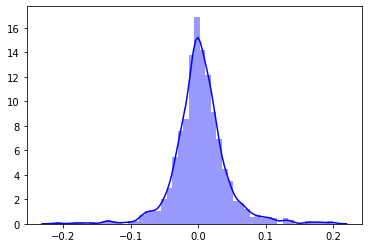

In [21]:

returns=np.array(news)[1:]/np.array(news)[:-1] - 1
## [1:] removes the first element 
##[:-1] removes the last element
## divide by these arrays so return array is r_t=St+1/St-1
## calculate mean and var of returns 
mean=np.average(news)
v=np.std(news)**2
##annualized vol 
v_year=np.sqrt(252)*np.std(returns)**2
## we will use the equation cond[t]=(phi + alpha*res[t-1]^2+beta*cond[t-1]^2)
sns.distplot(news, color="blue") #density plot of returns
# there is a noticeable skew towards the right 
print(news)

What a beautiful NORMAL distribution for returns. Below we utizlize historical VaR by simply sampling from the data and creating a distribution with which the VaR conf interval can be extracted.

-0.051877568151817675
[-0.05977769 -0.04519546]


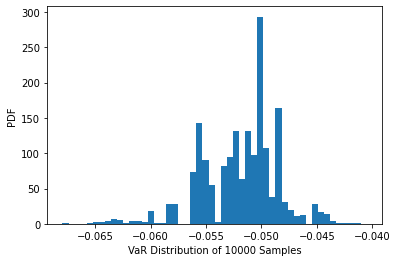

In [14]:
## Typically for historical distributions

def VaR_percent(data):
    return np.percentile(data, 5)
#This function will generate random samples with replacement
def bootstrap(data, func):
    sample = np.random.choice(data, len(data))
    return func(sample)
def draw_bs_reps(data, func, size):
    bs_replicates = np.empty(size)
    for i in range(10000):
        bs_replicates[i] = bootstrap(data, func)
    return bs_replicates

bootstrap_VaR = draw_bs_reps((news), VaR_percent, 10000)
plt.hist(bootstrap_VaR, bins=50, density=True)
plt.xlabel("VaR Distribution")
plt.ylabel("PDF")

conf_intervals = np.percentile(bootstrap_VaR, [2.0, 98.0])
print(conf_intervals)
print(bootstrap_VaR)

*The historical VaR simulation for TSLA reveals* that the mean bootstraped VaR is -5%
The historical method is by far the least relied upon due to the nature of time series to rapidly progress over time making older data not as useful, it is common practice in time-series to only consider 100 data points.

Recall the GARCH(p,q) model :
\begin{array}{rcl}
\\ a_t &=& \sigma_t \epsilon_t 
\\ \sigma^2_t &=& \psi_0 + \Sigma^q_i \alpha_i a_{t-i} + \Sigma^p_i \beta_i r_{t-i}
\end{array}
The parameters obey the follow constraints
\begin{array}{rcl}
\psi_0,\alpha,\beta >= 0
\\ \alpha + \beta < 1
\\ v_{longrun}&=& \frac{\psi_0}{1-\alpha-\beta}
\end{array}

In [15]:
def GARCH(x):
    # Declare parameters for model
    mu = x[0]
    phi = x[1]
    alpha = x[2]
    beta = x[3]
    
    con=np.zeros(len(news))
    v_long=(phi/(1-alpha-beta))**(1/2)
    resid=news-mu
    real=abs(resid)
    con[0]=v_long
    
    for p in range(1,len(news)):
        # simply take square root of the equatiom above!
        # we regress on both the residual and the previous con! 
        con[p]=(phi+alpha*resid[p-1]**2+beta*con[p-1]**2)**(1/2)
        
    liklihood=1/((2*np.pi*con)**(1/2))*np.exp(-real**2/(2*con**2))
    log_hood=np.sum(np.log(liklihood))
    return -log_hood

# Many other scipy can be used or a custom optimizer
res = spop.minimize(GARCH, [mean, v, 0, 0], method='Nelder-mead')
print(res)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


 final_simplex: (array([[2.71932901e-03, 3.80481178e-04, 2.16560114e-01, 7.45293282e-01],
       [2.71998619e-03, 3.80540149e-04, 2.16644578e-01, 7.45211363e-01],
       [2.71901345e-03, 3.80277859e-04, 2.16522148e-01, 7.45388041e-01],
       [2.71653896e-03, 3.80356093e-04, 2.16521697e-01, 7.45342257e-01],
       [2.71942530e-03, 3.80616157e-04, 2.16646081e-01, 7.45219432e-01]]), array([-359.78258785, -359.78258722, -359.78258715, -359.78258667,
       -359.78258606]))
           fun: -359.78258784816353
       message: 'Optimization terminated successfully.'
          nfev: 501
           nit: 302
        status: 0
       success: True
             x: array([2.71932901e-03, 3.80481178e-04, 2.16560114e-01, 7.45293282e-01])


log-likelihood 359.78258784816353
The Akakike information criterion-0.003351999869104765
[0.73789984 0.7032248  0.6635432  ... 0.47394009 0.47057994 0.00271933]


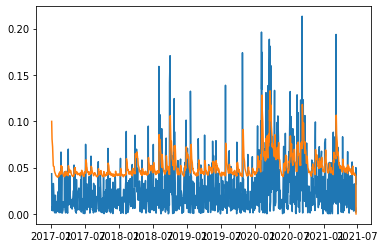

In [172]:
## Now loading in our optimized parameters and given hyperparam
#next we shall calculate the Akakike Information condition 

#calculate our GARCH con by simply looping through 
mu = res.x[0]
phi = res.x[1]
alpha = res.x[2]
beta = res.x[3]

log_hood = -float(res.fun)
long_run = (phi/(1 - alpha - beta))**(1/2)
resid = news - mu
real = abs(resid)
con = np.zeros(len(news))
con[0] =  long_run

# Now finally loading our GARCH(1,1)
for t in range(1,len(returns)):
    con[t]=(phi + alpha*resid[t-1]**2 + beta*con[t-1]**2)**(1/2)

print('log-likelihood '+str((log_hood)))
AIC=-(2/len(returns))*np.log(log_hood)+(2/len(returns)) *4
print('The Akakike information criterion'+str((AIC)))
plt.plot(series.index[1:],real)
plt.plot(series.index[1:],con)
#error=100*(real-con)/real
#print(error)
print()

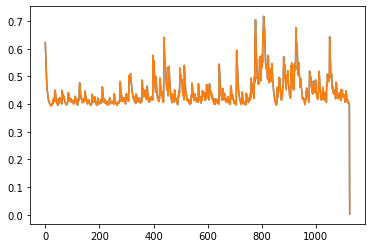

In [190]:
plt.plot(mu+np.sqrt(con)*stats.t.ppf(1-0.025,999))
plt.plot(mu+np.sqrt(con)*norm.ppf(1-0.025))

The GARCH(1,1) forecast via pure python on TSLA is clearly successful with AIC: 359, which is relatively low compareed to other GARCH forecasts. Notably we see the model is slow to react to exponential growth and still reverts back to the long run mean. As we will see the model forecasting within the ARCH package can be a lot easier for fitting GARCH with not only normal distributions.

In [26]:
from arch import arch_model
from scipy import stats

In [27]:
## Using the ARCH package model forecasting is alot easier 
## as clearly the model can be fit in one line of code 
# the only issue wit this is transparency, if youy dont understand the mod4l you are using then 
# it is not wise to plug and chug as bad things may occur
#using the skewed t distribuyion we will train our grach model accoutning for the fatter
#tails of returns

am = arch_model(100*news, vol="Garch", p=1, o=0, q=1, dist='skewt')
res2 = am.fit(update_freq=4)
print(res2)

Iteration:      4,   Func. Count:     38,   Neg. LLF: 2950.9015483412536
Iteration:      8,   Func. Count:     75,   Neg. LLF: 2947.7678866377864
Iteration:     12,   Func. Count:    112,   Neg. LLF: 2945.371325127153
Iteration:     16,   Func. Count:    144,   Neg. LLF: 2945.0128915114356
Iteration:     20,   Func. Count:    176,   Neg. LLF: 2945.005382643449
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2945.005377072657
            Iterations: 21
            Function evaluations: 184
            Gradient evaluations: 21
                           Constant Mean - GARCH Model Results                           
Dep. Variable:                                 y   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -2945.01
Distribution:      Standardized Skew Student's t   AIC:           

Visualizing the standardized residuals through the graph is not particularly useful but rather the VaR that is deduced from the forecast, which is -1.96%. Using the seaborn probability density graphs below we plot a histogram of the standardized residuals with a skewed t distribution fit on top. Using the skewed T distribution below we obtain the expected VaR -6.45%.

/opt/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


            h.1        h.2        h.3        h.4        h.5
1125  11.614737  11.681768  11.748478  11.814869  11.880943
VaR conf interval[-2.52947484 -1.42011021] and mean VaR -1.9748%


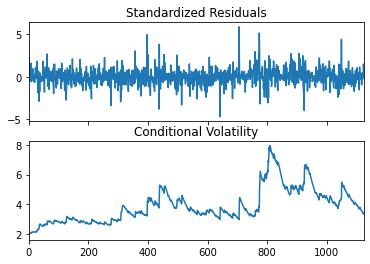

In [35]:
# 
## After optimizationm the forecsst is readily available through the
# .forecast command, 
# the graphs of the standardized residuals are below 
## Calculating the VAR 
forecasts = res2.forecast(reindex=False)
cond_mean = forecasts.mean
cond_var = forecasts.variance
q = am.distribution.ppf([0.01, 0.05], res2.params[-2:])

gm_forecast = res2.forecast(horizon = 5)
# graph the standardized residuals and print the VaR
print(gm_forecast.variance[-1:])
res2.plot()
print("VaR conf interval{} and mean VaR {}%".format(q,round(np.mean(q),4)))

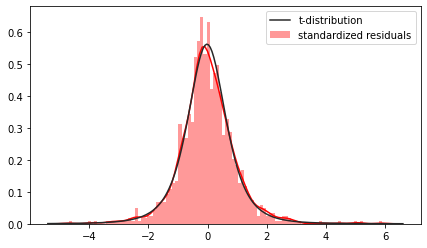

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
P-values,0.993198,0.669885,0.56615,0.720219,0.637599,0.644812,0.637859,0.732138,0.810065,0.709633


In [421]:
from statsmodels.stats.diagnostic import acorr_ljungbox
gm_resid = res2.resid
gm_std = res2.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid /gm_std

# Plot the histogram of the standardized residuals
plt.figure(figsize=(7,4))
# fit the residuals to a T-distribution
sns.distplot(gm_std_resid, norm_hist=False, fit=stats.t, bins=100, color='r')
plt.legend(('t-distribution', 'standardized residuals'))
plt.show()
#plt.plot(gm_std,label='SkewedT')
#plt.plot(returns,label='Returns')


# Ljung-Box: test the residuals for autocorrelation
lb_test = acorr_ljungbox(gm_std_resid , lags = 10)

df = pd.DataFrame({'P-values': lb_test[1]}).T

#  lag array
col_num = df.shape[1]
col_names = ['lag_'+str(num) for num in list(range(1,col_num+1,1))]

# p-values
df.columns = col_names
df


The results of the Ljung Box tets is above. The test revealed that since the P-value are greater than than alpha of .05 then we *reject* the null hypothesis that the residuals *do not* exhibit autocorrelation. 

In [65]:
value_at_risk = -cond_mean.values - np.sqrt(cond_var).values * q[None :]
value_at_risk = pd.DataFrame(value_at_risk, columns=["1%", "5%"], index=cond_var.index)
varrr=(8.34+4.56)/2
print(value_at_risk)

print("{}".format(varrr))

            1%        5%
1125  8.343016  4.562257
6.449999999999999


Now we will create another two GARCH(1,1) t distribution to compare parametric simulation and parametric bootstrapping.

In [423]:
egarch_gm = arch_model((100*news), p = 1, q = 1, o = 0, vol = 'EGARCH', dist = 't')
gjr_gm = arch_model((100*news), p = 1, q = 1, o = 0, vol = 'GARCH', dist = 't')

# Fit the model
gjrgm_result = gjr_gm.fit(disp = 'off')

# Print model fitting summary
print(gjrgm_result.summary())
# Fit the model
egarch_result = egarch_gm.fit(disp = 'off')

# Print model fitting summary
print(egarch_result.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2946.11
Distribution:      Standardized Student's t   AIC:                           5902.22
Method:                  Maximum Likelihood   BIC:                           5927.36
                                              No. Observations:                 1126
Date:                      Sat, Jan 29 2022   Df Residuals:                     1125
Time:                              21:07:46   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

/opt/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


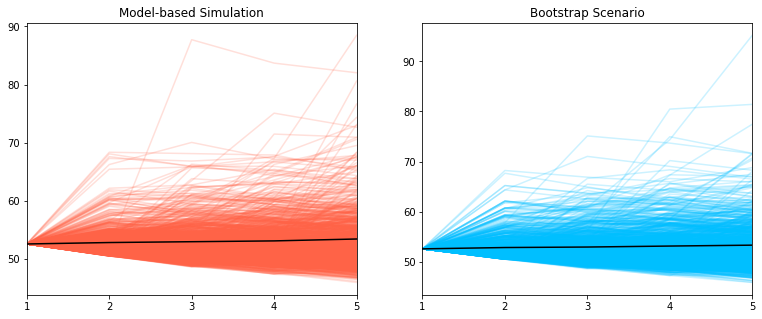

In [424]:

gjrgm_vol = gjrgm_result.conditional_volatility
egarch_vol = egarch_result.conditional_volatility

sim_forecasts = egarch_result.forecast(horizon=5, method='simulation')
sim_paths = sim_forecasts.simulations.residual_variances[-1].T
sim = sim_forecasts.simulations

bs_forecasts = egarch_result.forecast(horizon=5, method='bootstrap')
bs_paths = bs_forecasts.simulations.residual_variances[-1].T
bs = bs_forecasts.simulations

fig, axes = plt.subplots(1, 2, figsize=(13,5))

x = np.arange(1, 6)

# Plot the paths and the mean, set the axis to have the same limit
axes[0].plot(x, np.sqrt(252 * sim_paths), color='tomato', alpha=0.2)
axes[0].plot(x, np.sqrt(252 * sim_forecasts.residual_variance.iloc[-1]),
    color='k', alpha=1)

axes[0].set_title('Model-based Simulation')
axes[0].set_xticks(np.arange(1, 6))
axes[0].set_xlim(1, 5)

axes[1].plot(x, np.sqrt(252 * bs_paths), color='deepskyblue', alpha=0.2)
axes[1].plot(x,np.sqrt(252 * bs_forecasts.residual_variance.iloc[-1]),
    color='k', alpha=1)

axes[1].set_xticks(np.arange(1, 6))
axes[1].set_xlim(1, 5)

axes[1].set_title('Bootstrap Scenario')
plt.show()



Using the varaince covariance method to calculate VaR and CVaR for a 2 stock portforlio of TSLA and ENPH. 
As such: \begin{array}{rcl}
\\ \sigma &=& \sqrt{w_0 \Sigma w^T_0}
\\ VaR &=& \mu + Z(\alpha) \sigma
\\ CVaR  &=& \int^1_\alpha VaR(\chi) d\chi
\\ w_0 w^T_0 =1
\end{array}
The discretized CVar becomes a mean \begin{array}
CCVar= \frac{1}{N}\Sigma^1_\alpha Var(\chi)
\end{array}

In [163]:
# Simply using the equation above and loopoing through the stuf

def stuf(level,al,return1):
    cov=np.cov(return1)
    w_0=[level,1-level]
    w_0=np.array(w_0)
    std=np.sqrt(w_0@cov@w_0.T)
    conf=norm.ppf(al)
            
            
    return (np.mean(news)+np.mean(news2))/2+(-conf*std)

def murisk(level,stuff1,stuff2):
    w_0=[level,1-level]
    w_0=np.array(w_0)
    muvec=np.array([np.mean(stuff1),np.mean(stuff2)])
    mu=muvec.T@w_0
             
    return mu


def stdrisk(level,stuff1,stuff2):
    cov=np.cov(stuff1,stuff2)
    w_0=[level,1-level]
    w_0=np.array(w_0)
    std=np.sqrt(w_0@cov@w_0.T)
             
    return std

In [123]:
import statsmodels.api as sm
# Add a constant to the independent value

news3= yf.download(["SPY"], start, end)['Close'].pct_change(periods=1)
news5= yf.download(["TSLA"], start, end)['Close'].pct_change(periods=1)
#returnnew3= np.array(news3)[1:]/ np.array(news3)[:-1]-1
#rm=np.mean(returnnew3)

#X1 = sm.add_constant(news[0:1123])

# make regression model 
#model = sm.OLS(returnnew3[0:1123],X1)

# fit model and print results
#results = model.fit()
#print(results.summary())
#3 Trying to calculate the Beta but somereason it is not working
beta,alpha,r_value,p_value,std_err = stats.linregress(news3[0:1123],news[0:1123])
print(beta)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
nan


In [102]:
print(er)

nan


In [168]:
# i try to use Scipy but it does not take my bounds and often the paramters converge to 1 
level=0.1
res4 = minimize(stuf, method='L-BFGS-B', x0=level,args=(0.99,data), tol=1e-20, 
                    options={"maxiter":3000})

print(res4)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

[-12.154969213323612, -11.635408405903343, -11.134612064074657, -10.655117261502877, -10.199799462754331, -9.77188743635927, -9.374959784843984, -9.012913000134251, -8.689889478253134, -8.410154534880432, -8.177915821255933, -7.9970880372389725, -7.871020346215913, -7.802220384739698, -7.792120993422763, -7.840936482546009, -7.947640473418728, -8.11007045951885, -8.32513528919556, -8.589082067872617]


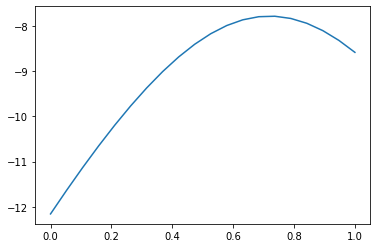

In [74]:
# Since this has only 2-d parameeter space and w_0=1-w_1 it is useful to graph
# the max value of VaRi s given and no scipy needed 
#VaR ~ -8%
from scipy.stats import norm
line=np.linspace(0,1,num=20)
collect=[]
for u, o in enumerate(line):
    collect.append(100*stuf(o,0.99,data))
print(collect)
plt.plot(line,collect)




In [164]:

line4=np.linspace(0,1,num=30)
collect4=[]
collect5=[]
for u, o in enumerate(line4):
    collect4.append(murisk(o,news,news2))
    collect5.append(stdrisk(o,news,news2))
collect4=np.array(collect4)
collect5=np.array(collect5)

#riskmu=collect4[:][0]
#riskstd=collect4[1][:]

#print(riskmu)



[0.05421781 0.05274596 0.05130724 0.04990449 0.04854086 0.04721971
 0.04594472 0.04471983 0.04354928 0.04243756 0.04138941 0.04040977
 0.03950375 0.03867652 0.03793324 0.03727891 0.03671831 0.03625578
 0.03589512 0.0356394  0.03549091 0.03545098 0.03551999 0.03569731
 0.03598132 0.03636954 0.03685867 0.03744476 0.03812333 0.03888955]


Text(0, 0.5, 'Mu return')

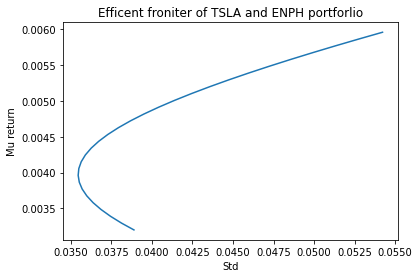

In [170]:
plt.plot(collect5,collect4)
plt.title("Efficent froniter of TSLA and ENPH portforlio")
plt.xlabel('Std')
plt.ylabel('Mu return')

[-4.087362423413725, -4.1947372305780775, -4.306554460383364, -4.4233188877704315, -4.545627572392897, -4.674194230195194, -4.809882300271517, -4.953750743020993, -5.107118986959495, -5.27166158426094, -5.449550660593521, -5.64367862892471, -5.8580228544524315, -6.0982778734389615, -6.373034180277813, -6.696197810594519, -7.092668162881072, -7.614653070622824, -8.4087193190113, -10.502299528442844]
[        nan -4.08736242 -4.14104983 -4.19621804 -4.25299325 -4.31152011
 -4.3719658  -4.4345253  -4.49942848 -4.56694965 -4.63742084 -4.71125083
 -4.78895314 -4.87118927 -4.95883846 -5.05311817 -5.15581065 -5.26974345
 -5.4000162   0.        ]
(20,)


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


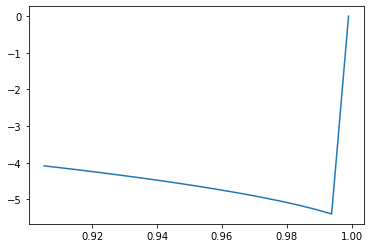

In [75]:

## Now using the integral equation for the cvar is simply the same as looping through 
# the level parameter and taking the mean
## the CVar is 
line2=np.linspace(.90,.999,num=20)
collect2=[]
cvar=np.zeros(20)
for u, o in enumerate(line2):
    collect2.append(100*stuf(0.7,o,data))
print(collect2)
n=0
for n in range(len(cvar)-1):
    cvar[n]=np.mean(collect2[0:n])
print(cvar)
print(np.shape(cvar))
plt.plot(line2,cvar)
## The CVAR is -5 at .99 percent 

## *Conclusion:* Using a GARCH in pure python we forecast TSLA volatility, then we used the ARCH module and ran several simulations of historical, regular model and bootsrapping model for TSLA, then lastly we used the VCV method to calculate VaR and CVar on a portforlio that has ENPH and TSLA.


## 